## About

In this notebook we prepare a simple solution for the [kaggle challenge on higgs.](https://inclass.kaggle.com/c/mlhep-2016-higgs-detection)

In [17]:
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt

import pandas
import numpy

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

### Get data

In [19]:
data = pandas.read_csv('train_100000.csv')
test = pandas.read_csv('test.csv')

### Read the smallest part of training file and test file

In [20]:
data.head()
#data.shape
#data['lepton_pt']
#data['sum_pt'] = data['lepton_pt']+data['mem_pt']+data['jet1_pt']+data['jet2_pt']+data['jet3_pt']+data['jet4_pt']
#pt_features = list(filter(lambda feature: feature.endswith("_pt"), features.columns))
#print(pt_features)
#pandas.options.display.max_columns = 40
data.shape

#print data[1:3]
#print data1[1:3]

(100000, 30)

### Divide training data into 2 parts 
`train_test_split` function is used to divide into 2 parts to preserve quality overestimating.


In [21]:
test.head()

,event_id,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1,58.8144,-1.223200,1.290720,26.4357,2.60877,68.4133,0.639561,-1.226550,1.00001,...,-1.195190,1.76769,0.00000,72.1903,170.811,78.6442,224.814,95.7374,372.835,469.654
1,2,21.3908,-0.468277,-1.371400,57.1860,1.21413,118.1280,-0.113784,-2.182010,0.00000,...,0.965376,2.69802,1.00000,62.7363,215.426,73.9714,211.729,195.9100,310.480,431.597
2,3,58.5702,1.443090,0.105191,54.4510,-2.35435,26.4436,-1.911660,1.337630,0.00000,...,-2.212250,-2.60951,0.00000,48.1728,163.507,106.1110,260.644,351.3290,638.053,790.961
3,4,70.4693,0.166176,-1.962430,38.1390,2.56489,42.6784,-1.256610,-0.276156,2.00000,...,-0.007441,3.04872,2.00002,99.0998,158.532,79.7015,169.550,96.0569,305.073,402.656
4,5,113.4570,0.232503,2.941150,64.4011,1.12581,164.2890,-0.735258,-0.590741,1.99994,...,-0.943712,1.59953,2.00002,50.8161,200.100,130.0140,187.637,142.1460,433.032,507.496


### Define training features

Exclude `event_id`, `target` from the features set

In [22]:
All_features = list(set(data.columns) - {'event_id', 'target'})
#features = list(set(data.columns))
#features = data.columns
All_features

['jet3_pt',
 'jet3_eta',
 'm_jjj',
 'mem_phi',
 'jet1_pt',
 'jet4_phi',
 'jet1_phi',
 'jet2_eta',
 'jet3_btag',
 'm_jlv',
 'm_wbb',
 'jet4_pt',
 'jet4_btag',
 'jet2_pt',
 'jet1_btag',
 'm_jj',
 'm_wwbb',
 'jet2_phi',
 'lepton_phi',
 'm_bb',
 'm_lv',
 'jet4_eta',
 'jet2_btag',
 'lepton_pt',
 'mem_pt',
 'lepton_eta',
 'jet3_phi',
 'jet1_eta']

### Prepare high-level features for training

In [23]:
high_level_features = ['m_jj', 'm_jjj', 'm_jlv', 'm_wwbb', 'm_bb', 'm_wbb', 'm_lv']


## Prepare lowh-level features for training


In [24]:
low_level_features =list(set(All_features) - set(high_level_features))
low_level_features

['jet3_pt',
 'jet3_eta',
 'jet4_eta',
 'jet2_btag',
 'jet1_btag',
 'jet4_btag',
 'lepton_pt',
 'jet3_btag',
 'jet2_pt',
 'mem_phi',
 'lepton_eta',
 'jet1_pt',
 'jet3_phi',
 'jet2_phi',
 'jet4_phi',
 'lepton_phi',
 'jet1_eta',
 'mem_pt',
 'jet2_eta',
 'jet4_pt',
 'jet1_phi']

# High Level Features Construction

## pt pair

In [25]:
target = data.target
#features = data.drop("target", axis=1).astype(numpy.float64)
#features = data.astype(numpy.float64)
pt_features = list(filter(lambda data: data.endswith("_pt"), data.columns))
pt_features

['lepton_pt', 'mem_pt', 'jet1_pt', 'jet2_pt', 'jet3_pt', 'jet4_pt']

In [26]:

# pt pairs
from itertools import product
pt_pairs = frozenset(filter(lambda pair:len(pair) == 2, map(frozenset, product(pt_features, pt_features))))
print pt_pairs
data_pair_features = []
pair_names = []
for pt_pair in pt_pairs:
    m1, m2 = pt_pair
    data_pair_features.append(data[m1] + data[m2])
    pair_names.append("%s+%s" % (m1, m2))
data_pair_features = pandas.concat( data_pair_features, axis=1)
pandas.options.display.max_columns = 60
#pt_pair_features
data_pair_features.columns = pair_names
#data_pair_features
data[pair_names] = data_pair_features
pair_features = pair_names
print pair_features
#data['sum_pt'] = data['lepton_pt']+data['mem_pt']+data['jet1_pt']+data['jet2_pt']+data['jet3_pt']+data['jet4_pt']
data.head()
data.shape

frozenset([frozenset(['lepton_pt', 'jet1_pt']), frozenset(['jet3_pt', 'mem_pt']), frozenset(['jet2_pt', 'jet1_pt']), frozenset(['jet4_pt', 'jet1_pt']), frozenset(['lepton_pt', 'mem_pt']), frozenset(['lepton_pt', 'jet4_pt']), frozenset(['jet2_pt', 'jet4_pt']), frozenset(['jet2_pt', 'mem_pt']), frozenset(['jet3_pt', 'jet4_pt']), frozenset(['mem_pt', 'jet1_pt']), frozenset(['jet3_pt', 'jet2_pt']), frozenset(['lepton_pt', 'jet3_pt']), frozenset(['jet3_pt', 'jet1_pt']), frozenset(['lepton_pt', 'jet2_pt']), frozenset(['mem_pt', 'jet4_pt'])])
['lepton_pt+jet1_pt', 'jet3_pt+mem_pt', 'jet2_pt+jet1_pt', 'jet4_pt+jet1_pt', 'lepton_pt+mem_pt', 'lepton_pt+jet4_pt', 'jet2_pt+jet4_pt', 'jet2_pt+mem_pt', 'jet3_pt+jet4_pt', 'mem_pt+jet1_pt', 'jet3_pt+jet2_pt', 'lepton_pt+jet3_pt', 'jet3_pt+jet1_pt', 'lepton_pt+jet2_pt', 'mem_pt+jet4_pt']


(100000, 45)

In [31]:

data['sum_pt'] = data['lepton_pt']+data['mem_pt']+data['jet1_pt']+data['jet2_pt']+data['jet3_pt']+data['jet4_pt']

## bjets selection 

In [65]:

def delta_phi(phi1,phi2):
    delta = phi1 - phi2;
    if delta >= numpy.pi:
        delta -= 2*numpy.pi
    if delta < -1*numpy.pi:
        delta += 2*numpy.pi
    return numpy.abs(delta)

def delta_R(eta1,eta2,phi1,phi2):
    return numpy.sqrt((eta1-eta2)**2+(delta_phi(phi1,phi2))**2)

def getKey(item):
    return item[0]

#btag_features = list(filter(lambda data: data.endswith("_btag"), data.columns))
btag_features = ['jet1_btag','jet2_btag','jet3_btag','jet4_btag']
print btag_features
data_btags = data[btag_features]
jet_index = numpy.reshape(numpy.array([1,2,3,4],dtype='int_'),(len(btag_features),1))
#print jet_index
#print data_btags[0:10]
#print data[0:10]
del_pts_bb = []
del_phis_bb = []
del_Rs_bb = []
for index, row in data_btags.iterrows():
    np_row   = numpy.reshape(numpy.array(row),(len(btag_features),1))
    stack = list(numpy.reshape(numpy.hstack((np_row,jet_index)),(4,2)))
    stack_sorted = sorted(stack,key=getKey,reverse=True)[:]
    max1_index = int(stack_sorted[0][1])
    max2_index = int(stack_sorted[1][1])
    jet_label_1 = 'jet{}_'.format(max1_index)
    jet_label_2 = 'jet{}_'.format(max2_index)
    jet_max1_pt = data.iloc[index]['{}pt'.format(jet_label_1)]
    jet_max2_pt = data.iloc[index]['{}pt'.format(jet_label_2)]
    jet_max1_eta = data.iloc[index]['{}eta'.format(jet_label_1)]
    jet_max2_eta = data.iloc[index]['{}eta'.format(jet_label_2)]
    jet_max1_phi = data.iloc[index]['{}phi'.format(jet_label_1)]
    jet_max2_phi = data.iloc[index]['{}phi'.format(jet_label_2)]
    del_pt_bb  = numpy.abs(jet_max1_pt  - jet_max2_pt)
    del_phi_bb = delta_phi(jet_max1_phi, jet_max2_phi)
    del_R_bb   = delta_R(jet_max1_eta,jet_max2_eta,jet_max1_phi,jet_max2_phi)
    del_pts_bb.append(del_pt_bb)
    del_phis_bb.append(del_phi_bb)
    del_Rs_bb.append(del_R_bb)
    if index < 0:
        print   jet_label_1, jet_label_2, jet_max1_pt, jet_max2_pt, jet_max1_phi, jet_max2_phi, del_pt_bb, del_R_bb, del_phi_bb

#print np.array(del_pts_bb).shape
data['del_pt_bb']=numpy.array(del_pts_bb)
data['del_phi_bb']=numpy.array(del_phis_bb)
data['del_R_bb']=numpy.array(del_Rs_bb)
bjets_selection_fecture = ['del_pt_bb', 'del_phi_bb', 'del_R_bb']

['jet1_btag', 'jet2_btag', 'jet3_btag', 'jet4_btag']


In [66]:
data.head()

,event_id,target,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,jet2_pt,jet2_eta,jet2_phi,jet2_btag,jet3_pt,jet3_eta,jet3_phi,jet3_btag,jet4_pt,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,lepton_pt+jet1_pt,jet3_pt+mem_pt,jet2_pt+jet1_pt,jet4_pt+jet1_pt,lepton_pt+mem_pt,lepton_pt+jet4_pt,jet2_pt+jet4_pt,jet2_pt+mem_pt,jet3_pt+jet4_pt,mem_pt+jet1_pt,jet3_pt+jet2_pt,lepton_pt+jet3_pt,jet3_pt+jet1_pt,lepton_pt+jet2_pt,mem_pt+jet4_pt,sum_pt,del_pt_bb,del_phi_bb,del_R_bb
0,1000001,1,34.7506,0.787025,1.898890,20.8624,-2.623000,44.8141,-0.168171,2.631590,2.00002,57.6895,-0.161628,-0.682047,0.00000,71.9542,1.154230,-2.85851,2.00002,79.9480,0.877472,-0.256736,0.00000,81.7244,189.583,80.1183,170.086,91.1282,298.469,374.686,79.5647,92.8166,102.5036,124.7621,55.6130,114.6986,137.6375,78.5519,151.9022,65.6765,129.6437,106.7048,116.7683,92.4401,100.8104,310.0188,27.1401,0.793085,1.541989
1,1000002,1,54.2509,-1.057920,2.310700,51.1679,2.545750,31.0390,-2.220280,-0.737298,0.00000,52.2215,-1.094290,-0.252777,2.00002,42.7256,1.474830,2.90614,0.00000,71.6814,-1.139120,-1.300320,2.00002,65.8377,201.097,83.3216,208.040,67.1185,287.364,527.248,85.2899,93.8935,83.2605,102.7204,105.4188,125.9323,123.9029,103.3894,114.4070,82.2069,94.9471,96.9765,73.7646,106.4724,122.8493,303.0863,19.4599,1.047543,1.048502
2,1000003,1,47.7460,-0.783184,2.660330,68.1655,-1.700790,36.9453,-1.151740,-0.626912,0.00000,118.8810,-0.211263,1.326900,0.00000,40.9540,-1.149440,2.12315,1.00001,113.2470,-0.798898,-1.605550,2.00002,69.3169,156.335,95.3076,149.089,130.3890,237.879,336.059,84.6913,109.1195,155.8263,150.1923,115.9115,160.9930,232.1280,187.0465,154.2010,105.1108,159.8350,88.7000,77.8993,166.6270,181.4125,425.9388,72.2930,2.554485,2.578425
3,1000004,0,45.9501,1.613820,0.964722,39.3021,-0.075989,84.3074,0.465748,2.287780,2.00002,46.7880,0.441073,-1.303350,0.00000,15.2604,2.409050,-0.85050,0.00000,30.7413,-0.586711,-2.256250,2.00002,71.0321,182.342,81.9419,164.411,93.7095,237.900,392.808,130.2575,54.5625,131.0954,115.0487,85.2522,76.6914,77.5293,86.0901,46.0017,123.6095,62.0484,61.2105,99.5678,92.7381,70.0434,262.3493,53.5661,1.739155,2.032814
4,1000005,0,44.4092,-0.228907,-1.837970,49.8867,0.156533,32.8521,2.561650,2.641460,0.00000,46.2832,-1.488270,-2.524360,2.00000,29.6646,-0.031725,-1.19249,0.00000,138.7420,0.293522,1.391420,0.00000,122.0300,288.594,84.3865,150.300,69.8183,435.990,533.978,77.2613,79.5513,79.1353,171.5941,94.2959,183.1512,185.0252,96.1699,168.4066,82.7388,75.9478,74.0738,62.5167,90.6924,188.6287,341.8378,13.4311,1.117365,4.201233


# Plot Constracted Features

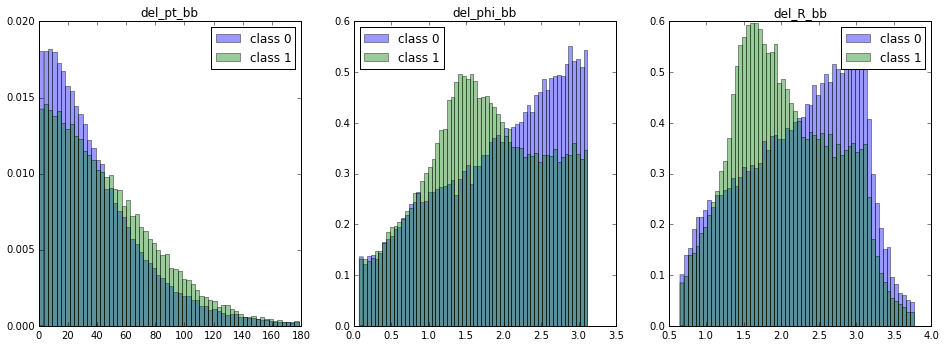

In [67]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}

# create the figure
plt.figure(figsize=(16, 12))
for n, feature in enumerate(bjets_selection_fecture):
    # add sub plot on our figure
    plt.subplot(len(bjets_selection_fecture) // 3 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    #plt.legend()
    plt.title(feature)

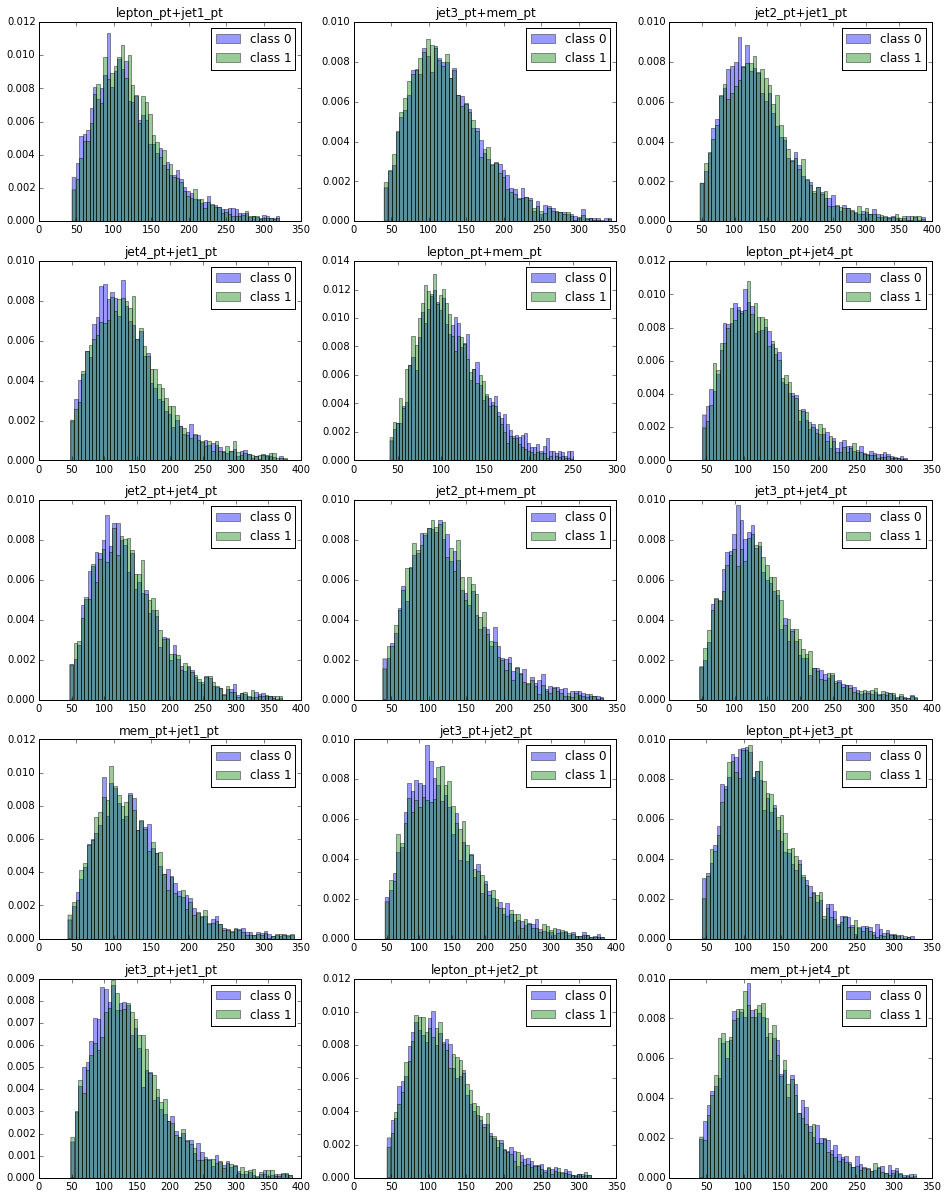

In [17]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}

# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(pair_features):
    # add sub plot on our figure
    plt.subplot(len(pair_features) // 3 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    #plt.legend()
    plt.title(feature)

### Plot histograms for each low-level feature

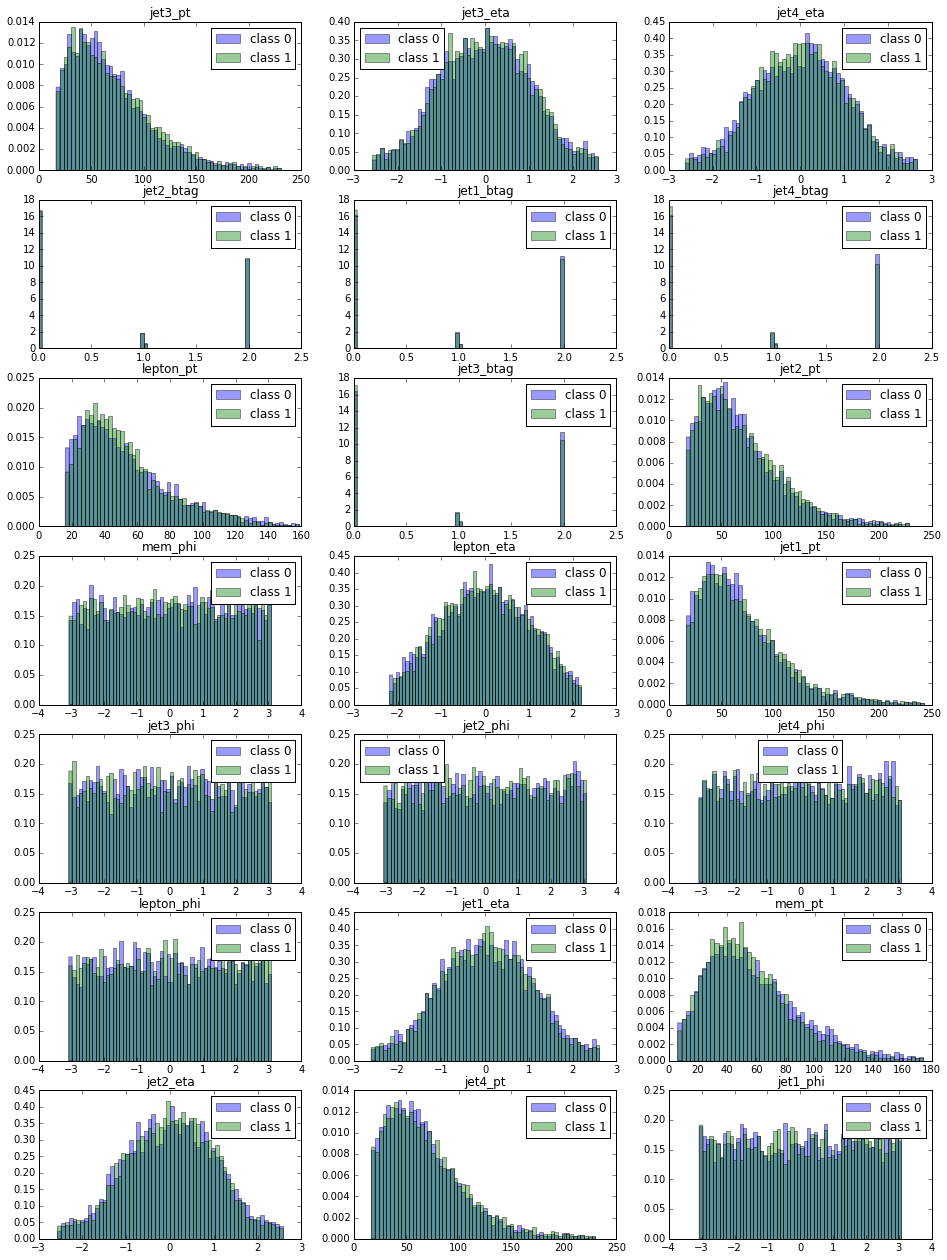

In [194]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(low_level_features):
    # add sub plot on our figure
    plt.subplot(len(low_level_features) // 3 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    #plt.legend()
    plt.title(feature)

### Plot histograms for each high-level feature

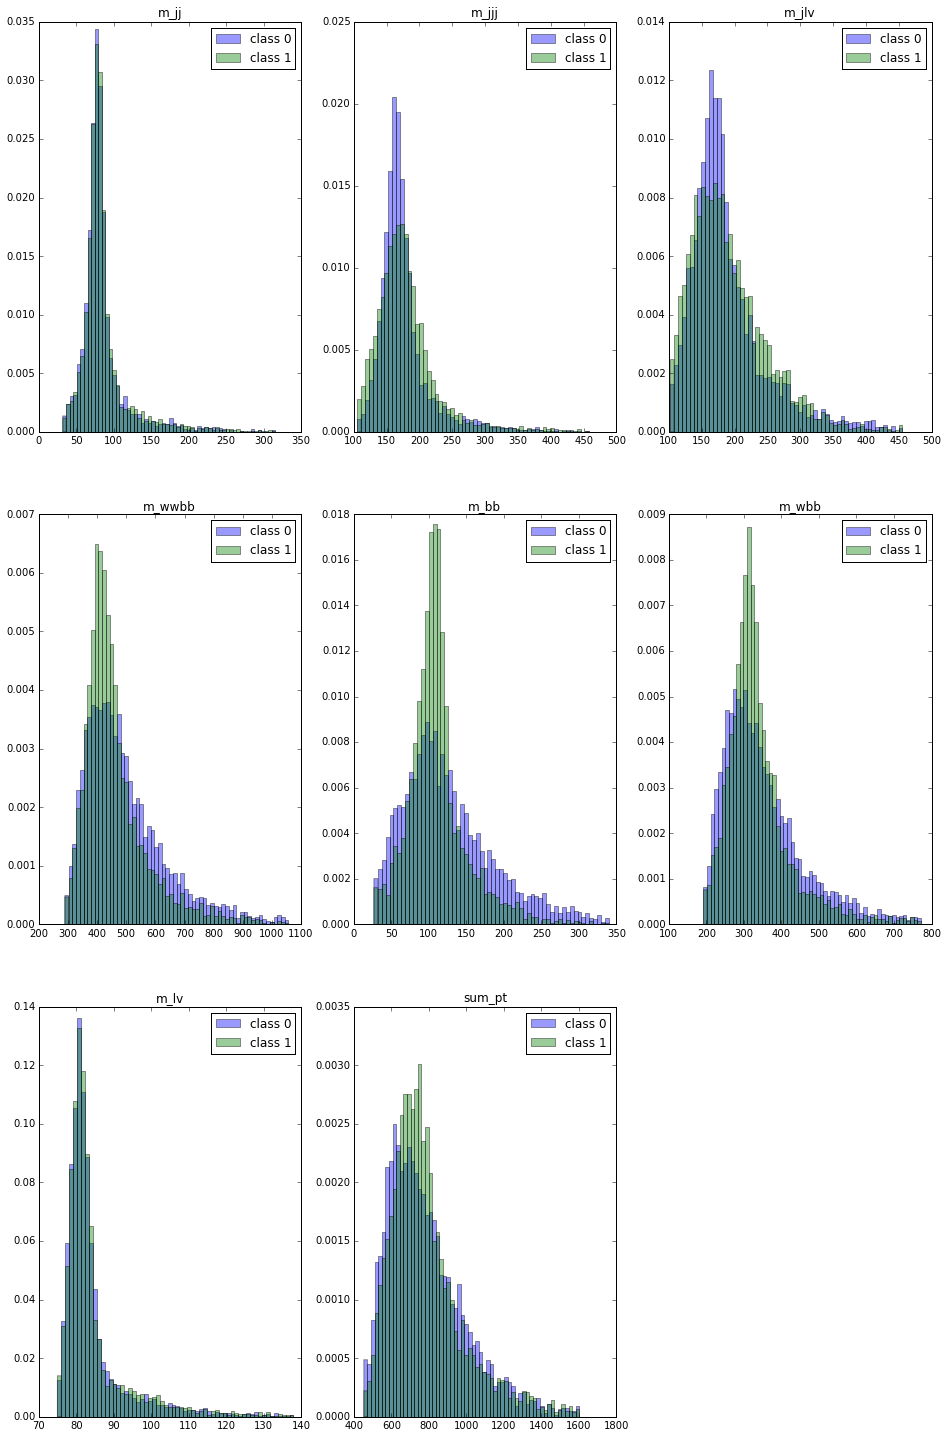

In [18]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(high_level_features):
    # add sub plot on our figure
    plt.subplot(len(high_level_features) // 3 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    #plt.legend()
    plt.title(feature)

### Divide training data into 2 parts 
`train_test_split` function is used to divide into 2 parts to preserve quality overestimating.


In [69]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.66)
training_data

,event_id,target,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,jet2_pt,jet2_eta,jet2_phi,jet2_btag,jet3_pt,jet3_eta,jet3_phi,jet3_btag,jet4_pt,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,lepton_pt+jet1_pt,jet3_pt+mem_pt,jet2_pt+jet1_pt,jet4_pt+jet1_pt,lepton_pt+mem_pt,lepton_pt+jet4_pt,jet2_pt+jet4_pt,jet2_pt+mem_pt,jet3_pt+jet4_pt,mem_pt+jet1_pt,jet3_pt+jet2_pt,lepton_pt+jet3_pt,jet3_pt+jet1_pt,lepton_pt+jet2_pt,mem_pt+jet4_pt,sum_pt,del_pt_bb,del_phi_bb,del_R_bb
2364,1002365,1,47.1511,0.278791,-2.167160,36.12690,-0.007276,94.3083,0.612360,2.398810,1.000010,60.4745,0.857755,-1.069520,0.000000,47.1767,2.014130,2.210180,0.00000,44.1787,-0.399480,0.563253,0.000000,64.2246,206.1360,78.0852,93.7105,113.9300,256.534,358.194,141.4594,83.30360,154.7828,138.4870,83.27800,91.3298,104.6532,96.60140,91.3554,130.43520,107.6512,94.3278,141.4850,107.6256,80.30560,329.41620,33.8338,2.814855,2.825532
31611,1031612,1,53.5435,0.171162,-1.409970,7.49669,-0.088957,87.7946,-1.225690,0.300458,2.000020,53.4859,-1.295450,2.385000,2.000020,47.7189,0.620704,-2.400350,0.00000,28.9108,0.601464,2.614540,0.000000,44.9253,156.6690,82.0063,272.0540,114.7740,369.049,488.403,141.3381,55.21559,141.2805,116.7054,61.04019,82.4543,82.3967,60.98259,76.6297,95.29129,101.2048,101.2624,135.5135,107.0294,36.40749,278.95039,34.3087,2.084542,2.085709
50494,1050495,1,57.9475,-1.719790,1.839020,31.95550,-0.012858,54.2349,-1.527040,-0.943240,0.000000,17.3305,1.104670,1.853060,1.000000,33.5258,-2.962200,0.223317,0.00000,51.9077,0.560852,2.584790,1.999940,81.8360,237.3790,85.2210,188.0000,28.5488,371.141,491.583,112.1824,65.48130,71.5654,106.1426,89.90300,109.8552,69.2382,49.28600,85.4335,86.19040,50.8563,91.4733,87.7607,75.2780,83.86320,246.90190,34.5772,0.731730,0.911684
27146,1027147,0,53.0142,0.710949,1.647320,36.46190,3.102500,109.7060,-0.616329,0.056693,1.000010,62.7993,-1.400980,1.652220,2.000000,119.2750,-2.908010,-2.109050,0.00000,34.5936,1.834730,-1.707720,0.000000,90.5319,242.2610,79.7937,290.3410,128.9980,437.611,582.530,162.7202,155.73690,172.5053,144.2996,89.47610,87.6078,97.3929,99.26120,153.8686,146.16790,182.0743,172.2892,228.9810,115.8135,71.05550,415.85000,46.9067,1.595527,1.778028
39454,1039455,0,39.3645,-1.219300,1.725800,59.49400,-0.281614,87.2628,-0.581307,2.582130,0.000000,42.8439,0.148266,-0.352443,0.000000,53.5612,0.849234,-1.832690,2.00000,32.1321,1.643040,-0.334275,1.000010,124.6250,209.2610,78.9077,247.7380,68.9321,323.510,481.614,126.6273,113.05520,130.1067,119.3949,98.85850,71.4966,74.9760,102.33790,85.6933,146.75680,96.4051,92.9257,140.8240,82.2084,91.62610,314.65850,21.4291,1.498415,1.695693
90624,1090625,0,45.9190,0.658147,-0.166516,31.08930,2.363830,49.6792,-0.631120,-0.510635,1.999940,27.4353,-2.050360,-2.535070,0.000000,30.9130,-0.137378,-1.333140,0.00000,63.6567,-0.142775,1.785080,2.000020,71.2685,161.1290,81.9034,131.1390,103.3210,230.560,332.937,95.5982,62.00230,77.1145,113.3359,77.00830,109.5757,91.0920,58.52460,94.5697,80.76850,58.3483,76.8320,80.5922,73.3543,94.74600,248.69250,13.9775,2.295715,2.347081
59014,1059015,1,44.2519,-0.548777,-1.351560,68.10350,-0.544233,53.7766,-0.172492,2.805150,2.000020,104.0110,-1.202270,1.778630,1.999940,22.7795,-1.158440,-0.414986,0.00000,26.1950,-1.190280,-1.891040,0.000000,36.3476,132.4040,84.0214,167.9700,106.8950,347.909,421.356,98.0285,90.88300,157.7876,79.9716,112.35540,70.4469,130.2060,172.11450,48.9745,121.88010,126.7905,67.0314,76.5561,148.2629,94.29850,319.11750,50.2344,1.026520,1.454024
42513,1042514,0,21.6659,0.755575,2.980720,78.26650,3.015860,110.4170,-1.252390,2.767060,2.000020,38.8371,-2.722150,2.766320,0.000000,60.0985,-0.258451,-0.606725,2.00002,160.8210,0.865707,-0.161265,0.000000,72.3743,167.1870,84.1623,304.3070,176.4930,682.737,1017.220,132.0829,138.36500,149.2541,271.2380,99.93240,182.4869,199.6581,117.10360,220.9195,188.68350,98.9356,81.7644,170.5155,60.5030,239.08750,470.10600,50.3185,2.909400,3.074496
11225,1011226,

### Simple knn from `sklearn` training

In [70]:
#training_features = high_level_features + bjets_selection_fecture #+ low_level_features
training_features=['m_jj', 'm_jjj', 'm_jlv', 'm_wwbb', 'm_bb', 'm_wbb', 'm_lv', 'sum_pt', 'del_pt_bb', 'del_phi_bb', 'del_R_bb']
print training_features
#training_features = features
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=6)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(training_data[training_features], training_data.target)
training_features

['m_jj', 'm_jjj', 'm_jlv', 'm_wwbb', 'm_bb', 'm_wbb', 'm_lv', 'sum_pt', 'del_pt_bb', 'del_phi_bb', 'del_R_bb']


['m_jj',
 'm_jjj',
 'm_jlv',
 'm_wwbb',
 'm_bb',
 'm_wbb',
 'm_lv',
 'sum_pt',
 'del_pt_bb',
 'del_phi_bb',
 'del_R_bb']

### Compute quality (ROC AUC) on the validation set (to prevent overestimating quality)

In [71]:
# predict validation sample (probability for each event)
proba = knn.predict_proba(validation_data[training_features])
# take probability to be 1 class to compute ROC AUC
roc_auc_score(validation_data.target, proba[:, 1])

0.7540186376270045

## Prepare submission to kaggle

In [72]:
# predict test sample
kaggle_proba = knn.predict_proba(test[low_level_features])[:, 1]
kaggle_ids = test.event_id

ValueError: query data dimension must match training data dimension

In [25]:
from IPython.display import FileLink
def create_solution(ids, proba, filename='baseline.csv'):
    """saves predictions to file and provides a link for downloading """
    pandas.DataFrame({'event_id': ids, 'prediction': proba}).to_csv('datasets/{}'.format(filename), index=False)
    return FileLink('datasets/{}'.format(filename))
    
create_solution(kaggle_ids, kaggle_proba)

/notebooks/higgs_kaggle/datasets/baseline.csv